## Crop Yield Predict
The primary goal of this project is to predict crop yield (hg/ha_yield) for different countries and crop types based on key environmental and agricultural parameters such as rainfall, pesticide usage, and temperature. By leveraging machine learning, the project aims to assist policymakers, researchers, and farmers in making data-driven decisions to optimize agricultural productivity and sustainability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv(r"C:\Users\yadav\Downloads\archive (2)\yield_df.csv") 

# It is supervisied machine learning problem 

In [3]:
df.head()        

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [4]:
df.tail()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657,2550.07,19.76


In [5]:
df.sample(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
26304,Thailand,Potatoes,1991,83333,1622,18849.00,27.85
23075,Pakistan,Sweet potatoes,2012,86553,494,990.09,24.87
12679,India,Potatoes,2002,194173,1083,42482.56,26.49
19231,Mexico,Cassava,1994,75260,758,34468.93,16.42
5754,Canada,Potatoes,1997,111195,537,38258.20,4.54
21636,Niger,Maize,2011,8405,151,10.59,30.10
18033,Lithuania,Wheat,2005,37332,656,1048.50,6.50
4442,Brazil,Maize,2010,43667,1761,342580.00,26.30
634,Argentina,Cassava,2007,100000,591,81582.64,17.14
4948,Bulgaria,Sorghum,2012,20205,608,1331.00,9.99


In [6]:
df.shape

(28242, 7)

In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [9]:
df.duplicated().sum()

np.int64(2310)

In [10]:
df.drop_duplicates(inplace=True) 

In [11]:
df.duplicated().sum() 

np.int64(0)

In [12]:
df.shape

(25932, 7)

In [13]:
print("Columns:", df.columns.tolist()) 

Columns: ['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']


In [14]:
df.describe() 

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [15]:
df.describe(include='object')

,Area,Item
count,25932,25932
unique,101,10
top,India,Potatoes
freq,3384,3956


In [16]:
df['Item'].nunique()

10

In [17]:
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [18]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

In [19]:
len(df['Area'])

25932

In [20]:
len(df['Area'].unique()) 

101

In [21]:
country=(df['Area'].unique())

In [22]:
country

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [23]:
df['Area'].value_counts()

Area
India         3384
Brazil        1854
Mexico        1280
Australia      966
Pakistan       966
              ... 
Latvia          42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

In [24]:
df['average_rain_fall_mm_per_year'].nunique()

100

In [25]:
df['average_rain_fall_mm_per_year'].unique()

array([1485,   89, 1010,  591,  562,  534, 1110,  447, 1292,   83, 2666,
        618,  847,  416, 1761,  608,  748, 1274, 1604,  537, 1342, 1522,
       3240, 1113,  703, 1410, 2274,   51, 1784,  383,  626,  536,  867,
        700, 1187,  652, 1996, 1651, 2387, 1440, 1976,  589, 1083, 2702,
        216, 1118,  832, 2051, 1668,  250,  630,  641,  661,  788,   56,
        656, 1513, 1181, 2875,  282,   92, 2041,  758,  241,  346, 1032,
        285, 1500,  778, 1732, 2280,  151, 1414,  494, 3142, 1738,  600,
        854,   74,  637, 1212,   59,  686, 1162,  495,  636, 1712, 2331,
        624, 1537,  691, 1622,  207,  593, 1180,  565, 1220, 1300, 1020,
        657])

In [26]:
df['average_rain_fall_mm_per_year'].value_counts()

average_rain_fall_mm_per_year
1083    3384
1761    1854
758     1280
534      966
494      966
        ... 
626       42
641       42
847       39
83        29
241       24
Name: count, Length: 100, dtype: int64

In [27]:
df['avg_temp'].nunique()

1831

In [28]:
df['avg_temp'].unique()

array([16.37, 15.36, 16.06, ..., 21.93, 21.57, 20.75])

In [29]:
df['avg_temp'].value_counts()

avg_temp
27.20    90
27.23    81
27.01    75
27.21    75
27.28    74
         ..
5.58      2
6.83      2
7.47      2
5.67      2
27.86     1
Name: count, Length: 1831, dtype: int64

In [30]:
df['pesticides_tonnes'].nunique()

1673

In [31]:
df['pesticides_tonnes'].unique()

array([ 121.  ,  201.  ,  251.  , ..., 3340.35, 3375.53, 2550.07])

In [32]:
df['pesticides_tonnes'].value_counts()

pesticides_tonnes
1597.00     708
34468.93    616
79821.18    378
26857.00    273
88.00       162
           ... 
12.50         1
16.25         1
10.45         1
12.59         1
9.84          1
Name: count, Length: 1673, dtype: int64

In [33]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield'] 
df=df[col] 

In [34]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.00,16.37,Albania,Maize,36613
1,1990,1485,121.00,16.37,Albania,Potatoes,66667
2,1990,1485,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.00,16.37,Albania,Sorghum,12500
4,1990,1485,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [35]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist() 

In [36]:
num_cols

['Year',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp',
 'hg/ha_yield']

In [37]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist() 

In [38]:
cat_cols

['Area', 'Item']


 Showing Boxplots Before Outlier Removal...


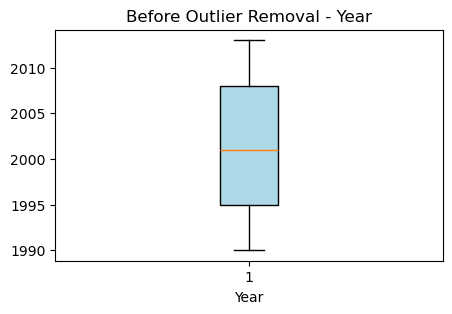

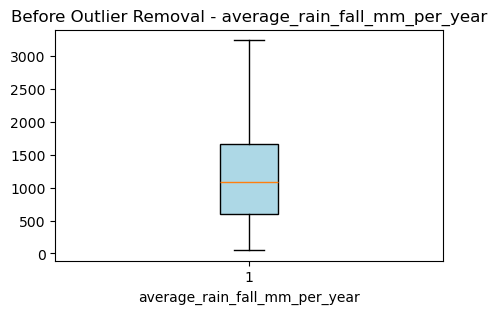

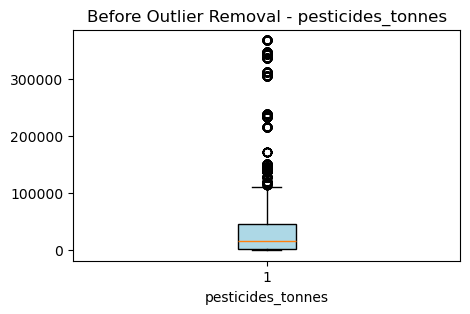

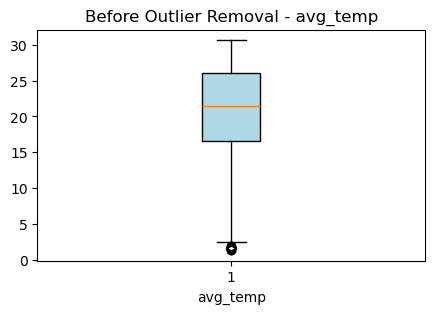

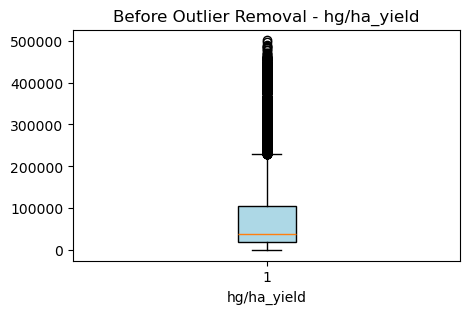

In [39]:
print("\n Showing Boxplots Before Outlier Removal...")
for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f"Before Outlier Removal - {col}")
    plt.xlabel(col)
    plt.show() 

In [40]:
print("\nHandling outliers using IQR method...")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    print(f"{col}: Removed {before - after} outliers") 


Handling outliers using IQR method...
Year: Removed 0 outliers
average_rain_fall_mm_per_year: Removed 0 outliers
pesticides_tonnes: Removed 1262 outliers
avg_temp: Removed 14 outliers
hg/ha_yield: Removed 1941 outliers


In [41]:
print("After Outlier Removal:", df.shape) 

After Outlier Removal: (22715, 7)



 Showing Boxplots After Outlier Removal...


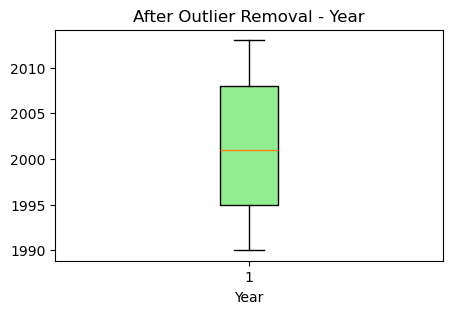

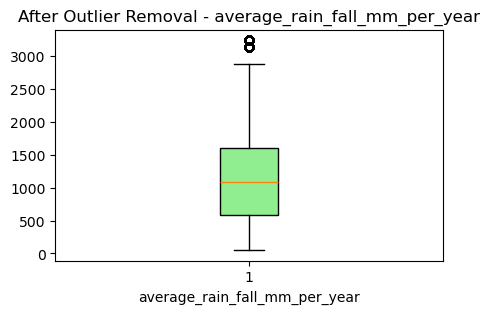

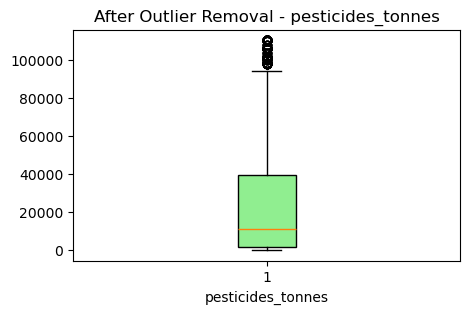

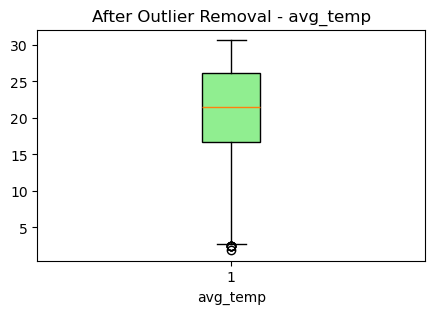

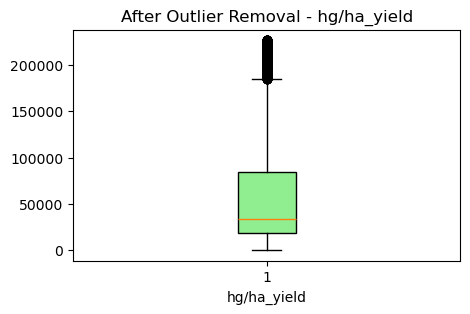

In [42]:
print("\n Showing Boxplots After Outlier Removal...")
for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f"After Outlier Removal - {col}")
    plt.xlabel(col)
    plt.show() 

In [43]:
skewness = df[num_cols].skew() 

In [44]:
skewness

Year                             0.081415
average_rain_fall_mm_per_year    0.952111
pesticides_tonnes                1.066453
avg_temp                        -0.728605
hg/ha_yield                      1.301120
dtype: float64

In [45]:
corr = df.select_dtypes(include='number').corr() 

In [46]:
yield_corr = corr[['hg/ha_yield']].sort_values(by='hg/ha_yield', ascending=False) 

In [47]:
yield_corr

,hg/ha_yield
hg/ha_yield,1.000000
average_rain_fall_mm_per_year,0.074491
pesticides_tonnes,0.051775
Year,0.032144
avg_temp,-0.010695


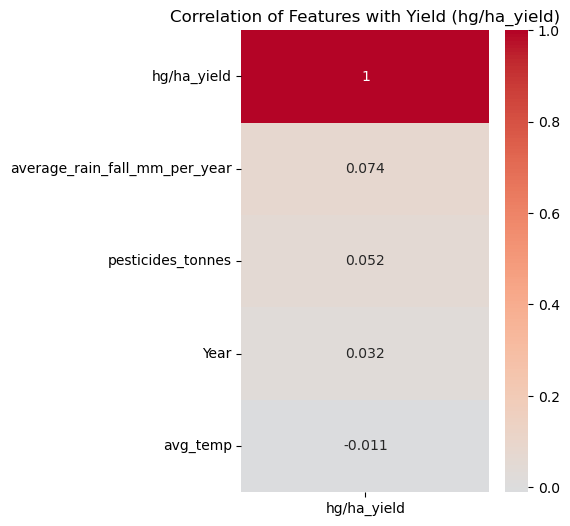

In [48]:
plt.figure(figsize=(4, 6))
sns.heatmap(yield_corr, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Correlation of Features with Yield (hg/ha_yield)')
plt.show() 

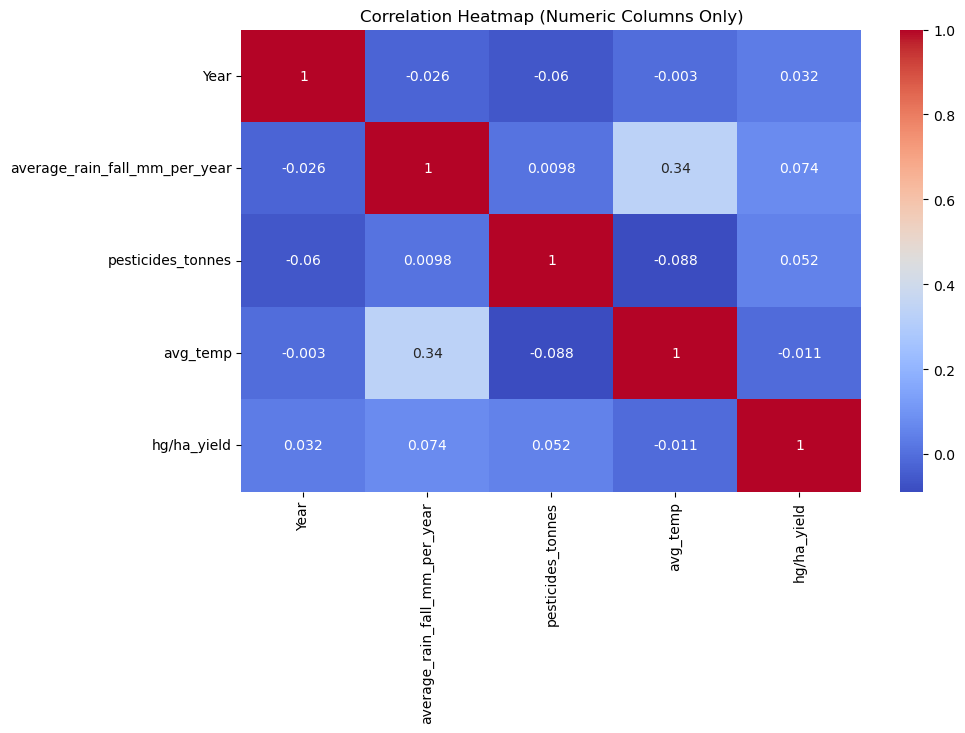

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [50]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.00,16.37,Albania,Maize,36613
1,1990,1485,121.00,16.37,Albania,Potatoes,66667
2,1990,1485,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.00,16.37,Albania,Sorghum,12500
4,1990,1485,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


# Train Test spilt Rearranagig Columns

In [51]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

In [52]:
df.head(3) 

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613
1,1990,1485,121.0,16.37,Albania,Potatoes,66667
2,1990,1485,121.0,16.37,Albania,"Rice, paddy",23333


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(X_train.columns) 

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item'],
      dtype='object')


In [55]:
X_train.shape

(18172, 6)

In [56]:
X_test.shape

(4543, 6)

In [57]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
1626,2010,534,42169.39,12.37,Australia,Sorghum
7559,1993,2274,1844.00,22.15,Ecuador,Soybeans
23699,2008,854,17080.26,16.12,Portugal,Maize
3028,1994,1761,84312.78,18.42,Brazil,Yams
935,1993,534,23899.00,20.19,Australia,Maize
...,...,...,...,...,...,...
15465,1997,216,848.00,19.23,Iraq,Potatoes
26929,2006,593,27421.00,17.71,Turkey,Sorghum
7572,1994,2274,2670.00,21.46,Ecuador,Plantains and others
960,1993,534,23899.00,11.84,Australia,Soybeans


In [58]:
num_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'] 

In [59]:
cat_features = ['Area', 'Item'] 

In [60]:
preprocesser = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),num_features),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

In [61]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Area', 'Item'])])

In [62]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test) 

In [63]:
preprocesser.get_feature_names_out(col[:-1]) 

array(['num__Year', 'num__average_rain_fall_mm_per_year',
       'num__pesticides_tonnes', 'num__avg_temp', 'cat__Area_Algeria',
       'cat__Area_Angola', 'cat__Area_Argentina', 'cat__Area_Armenia',
       'cat__Area_Australia', 'cat__Area_Austria', 'cat__Area_Azerbaijan',
       'cat__Area_Bahamas', 'cat__Area_Bahrain', 'cat__Area_Bangladesh',
       'cat__Area_Belarus', 'cat__Area_Belgium', 'cat__Area_Botswana',
       'cat__Area_Brazil', 'cat__Area_Bulgaria', 'cat__Area_Burkina Faso',
       'cat__Area_Burundi', 'cat__Area_Cameroon', 'cat__Area_Canada',
       'cat__Area_Central African Republic', 'cat__Area_Chile',
       'cat__Area_Colombia', 'cat__Area_Croatia', 'cat__Area_Denmark',
       'cat__Area_Dominican Republic', 'cat__Area_Ecuador',
       'cat__Area_Egypt', 'cat__Area_El Salvador', 'cat__Area_Eritrea',
       'cat__Area_Estonia', 'cat__Area_Finland', 'cat__Area_France',
       'cat__Area_Germany', 'cat__Area_Ghana', 'cat__Area_Greece',
       'cat__Area_Guatemala', 'ca

# Training Models 

In [64]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    
    y_train_pred = model.predict(X_train_dummy)
    y_test_pred = model.predict(X_test_dummy)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"{name}")
    print(f"    Train R²: {train_r2:.4f}")
    print(f"    Test  R²: {test_r2:.4f}")
    print(f"    Test MSE: {mse:.4f}")
    print("-" * 40)

lr
    Train R²: 0.7714
    Test  R²: 0.7655
    Test MSE: 695559348.1692
----------------------------------------
lss
    Train R²: 0.7713
    Test  R²: 0.7656
    Test MSE: 695291131.0924
----------------------------------------
Rid
    Train R²: 0.7713
    Test  R²: 0.7656
    Test MSE: 695227092.7140
----------------------------------------
Dtr
    Train R²: 1.0000
    Test  R²: 0.9576
    Test MSE: 125807623.0167
----------------------------------------


# Select Model 

In [65]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy) 

array([ 9368., 17425., 55926., ...,  4800., 36396., 31398.])

# Predictive System

In [66]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create the feature array (keep same structure)
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Convert to DataFrame with correct column names (so preprocesser can recognize them)
    columns = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']
    features_df = pd.DataFrame(features, columns=columns)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features_df)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features)[0]

    return predicted_yield  

In [67]:
Year = 2000 
average_rain_fall_mm_per_year=12.166107 
pesticides_tonnes= 18.195299 
avg_temp=236.121778 
Area="Saudi Arabia" 
Item="Sorghum" 

result=prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item) 

In [68]:
result

np.float64(13384.0)

# Pickle Files

In [69]:
import pickle 
pickle.dump(dtr, open('dtr.pkl', 'wb')) 
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocesser, f) 

In [70]:
import sklearn 
print(sklearn.__version__)

1.6.1


In [71]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.00,16.37,Albania,Maize,36613
1,1990,1485,121.00,16.37,Albania,Potatoes,66667
2,1990,1485,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.00,16.37,Albania,Sorghum,12500
4,1990,1485,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [72]:
1990	1485.0	121.00	16.37	Albania	Maize	36613

SyntaxError: invalid syntax (4163523114.py, line 1)